

# Titanic

[Based on this](https://www.kaggle.com/kushalrm/titanic-data-analysis-and-ml)

Focus on data visualisation

Dataset
1. PassengerId: ID of the passenger.
2. Pclass: Ticket Class.
3. Name: Name of the passenger.
4. Sex: gender orientation.
5. Age: passenger's age.
6. SibSp: siblings / spouses aboard the Titanic.
7. Parch: parents on the train.
8. Ticket: ticket number.
9. Fare: cost of the ticket.
10. Cabin: cabin number
11. Embarked: Port of Embarkation.
12. Survived: survived or not(1,0)

## Intro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = (9.0,9.0)

In [2]:
train = pd.read_csv("titanic-data/train.csv")
test  = pd.read_csv("titanic-data/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing value imputation

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 3 columns that have missing values.

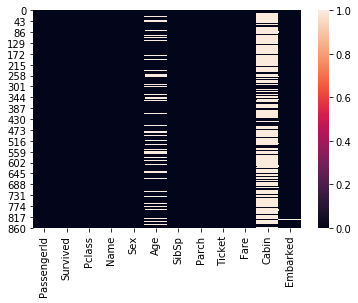

In [5]:
sb.heatmap(train.isnull())

In [6]:
# a function for imputing the age data
def imput(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
train['Age'] = train[['Age','Pclass']].apply(imput, axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# a function for missing value imputation of Embarked
def imput_em(Embarked):
    if pd.isnull(Embarked):
        return 'S'
    else:
        return Embarked

In [10]:
train['Embarked'] = train['Embarked'].apply(imput_em)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


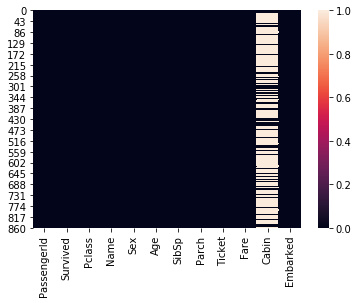

In [12]:
sb.heatmap(train.isnull())

### Same for test dataset (impute missing values)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
test["Age"] = test[["Age", "Pclass"]].apply(imput, axis=1)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data visualisation

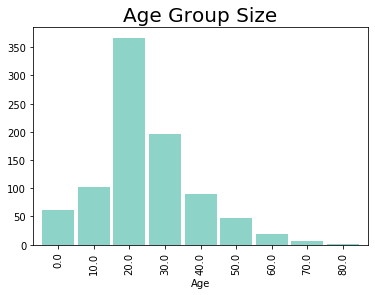

In [17]:
train.groupby( (train.Age//10) * 10).size().plot.bar(cmap='Set3', width=0.9)
plt.title('Age Group Size', fontsize = 20)
plt.show()

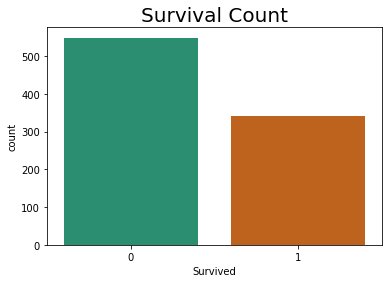

In [18]:
sb.countplot(x='Survived',data = train, palette = 'Dark2')
plt.title('Survival Count', fontsize = 20)
plt.show()

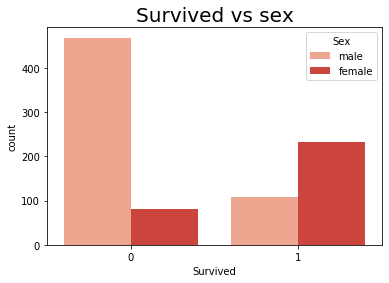

In [19]:
sb.countplot(x='Survived',hue = train['Sex'], data = train, palette = 'Reds')
plt.title('Survived vs sex', fontsize = 20)
plt.show()

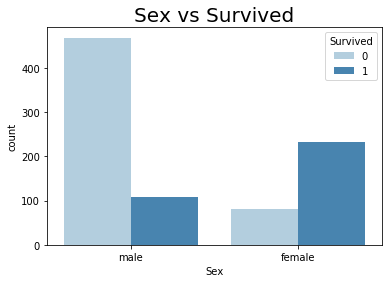

In [20]:
sb.countplot(x='Sex',hue = train['Survived'], data = train, palette = 'Blues')
plt.title('Sex vs Survived', fontsize = 20)
plt.show()

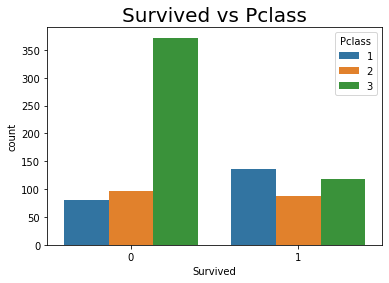

In [21]:
sb.countplot(x='Survived', hue='Pclass',data=train)
plt.title('Survived vs Pclass', fontsize = 20)
plt.show()

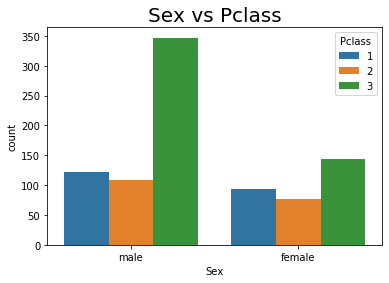

In [22]:
sb.countplot(x='Sex', hue='Pclass',data=train)
plt.title('Sex vs Pclass', fontsize = 20)
plt.show()

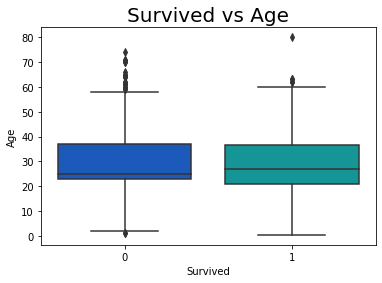

In [23]:
sb.boxplot(x='Survived', y='Age',data=train, palette = 'winter')
plt.title('Survived vs Age', fontsize = 20)
plt.show()

## Data encoding

In [24]:
train = train.set_index('PassengerId')
train = train.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin'])
train = pd.get_dummies(train, columns=['Pclass','SibSp','Sex', 'Embarked'])
train.head()

,Survived,Age,Parch,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,0,22.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,1,38.0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,1,26.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
4,1,35.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
5,0,35.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1


In [25]:
test = test.set_index('PassengerId')
test = test.drop(columns=['Name', 'Ticket', 'Fare', 'Cabin'])
test = pd.get_dummies(test, columns=['Pclass','SibSp','Sex', 'Embarked'])
test.head()

,Age,Parch,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,
892,34.5,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
893,47.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
894,62.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
895,27.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
896,22.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1


## Split train data

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train.drop(['Survived'], axis=1), train['Survived'], test_size=0.2, random_state=101)


## Learning parameters

In [27]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

## Learn the classifier

We use grid search to find the optimal parameters

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [30]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [31]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [36]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
pred = xgb.predict(x_val)

In [39]:
print('Score:', xgb.score(x_val,y_val))

Score: 0.7821229050279329


In [40]:
xgb2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
print('Score:', xgb2.score(x_val,y_val))

Score: 0.8100558659217877


In [43]:
pred2 = xgb2.predict(x_val)

## Classification report

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val,pred2))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        99
           1       0.87      0.68      0.76        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179



## ROC curve

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color = 'lime', label = 'ROC')
    plt.plot([0,1], [0, 1], color = 'darkblue', linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('true positive rate')
    plt.title('receiver operating charcteristic (ROC Curve')
    plt.legend()
    plt.show()

In [47]:
probs = model.predict_proba(x_val)

In [50]:
probs = probs[:,1]
probs

array([0.23488586, 0.93055284, 0.38117087, 0.3866116 , 0.16513063,
       0.08547703, 0.20730938, 0.07636523, 0.9663744 , 0.58906955,
       0.16513063, 0.28901967, 0.894146  , 0.07636523, 0.08454791,
       0.03435015, 0.48035276, 0.09544168, 0.12777704, 0.80399585,
       0.17164606, 0.09246168, 0.6910663 , 0.58906955, 0.06168521,
       0.22370142, 0.14135778, 0.16620874, 0.21203452, 0.10690083,
       0.91491324, 0.43680337, 0.6910663 , 0.28901967, 0.36364052,
       0.8896789 , 0.18827587, 0.08547703, 0.20859495, 0.39058673,
       0.3825634 , 0.58906955, 0.92797774, 0.11105161, 0.07381982,
       0.20730938, 0.10849924, 0.30384824, 0.17164606, 0.16513063,
       0.8979635 , 0.13660647, 0.9601535 , 0.839141  , 0.6910663 ,
       0.07636523, 0.12777704, 0.09544168, 0.2631206 , 0.9730988 ,
       0.91304487, 0.05308434, 0.08080286, 0.49980944, 0.08547703,
       0.06586117, 0.954151  , 0.20730938, 0.6186759 , 0.20730938,
       0.13874814, 0.12777704, 0.1846634 , 0.11658295, 0.64453

In [51]:
auc = roc_auc_score(y_val, probs)
print("auc:%.2f" %auc)

auc:0.88


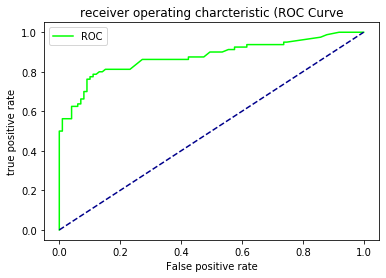

In [53]:
fpr, tpr, thresholds = roc_curve(y_val, probs)
plot_roc_curve(fpr,tpr)

In [54]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test.index
submission_df['Survived'] = xgb.predict(test)
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
